In [1]:
import pandas as pd
import os

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_path = '.'
save_path = '.'

In [4]:
df = pd.DataFrame()

for fp in os.listdir():
    if fp.endswith('.xls'):
        tmp_df = pd.read_excel(fp)
        df = df.append(tmp_df, ignore_index=True, sort=False)

df.shape

(18514, 10)

In [7]:
df.head()

,Unnamed: 0,district,roomnum,hall,AREA,C_floor,floor_num,school,subway,per_price
0,228955250,luohu,3,2,89.0,high,32,1,1,7.9551
1,228618097,luohu,3,2,69.4,high,6,1,1,6.5994
2,228893597,luohu,2,2,68.0,high,26,0,1,4.5118
3,228134160,luohu,2,2,62.0,middle,25,1,1,6.2581
4,228437852,luohu,2,1,51.7,middle,24,1,1,8.4333


In [5]:
df.rename(columns={'Unnamed: 0': 'house_id'}, inplace=True)

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
house_id,18514,NaN,NaN,NaN,2.2809e+08,3.03165e+06,4.21734e+06,2.27696e+08,2.28462e+08,2.28831e+08,2.28996e+08
district,18514,10,luohu,3299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roomnum,18514,NaN,NaN,NaN,2.87334,1.04084,1,2,3,3,9
hall,18514,NaN,NaN,NaN,1.81284,0.484765,0,2,2,2,6
AREA,18514,NaN,NaN,NaN,95.2249,48.5701,15,70.8,88,103.688,697.2
C_floor,18514,3,middle,7512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor_num,18514,NaN,NaN,NaN,27.4823,10.0837,1,23,30,33,90
school,18514,NaN,NaN,NaN,0.587447,0.492307,0,0,1,1,1
subway,18514,NaN,NaN,NaN,0.504159,0.499996,0,0,1,1,1
per_price,18514,NaN,NaN,NaN,6.11819,3.05022,1.0101,4.0526,5.2463,7.3574,26.3968


In [11]:
df[df.duplicated()]

,house_id,district,roomnum,hall,AREA,C_floor,floor_num,school,subway,per_price


In [6]:
del df['house_id'], df['floor_num']

In [13]:
df.head()

,district,roomnum,hall,AREA,C_floor,school,subway,per_price
0,luohu,3,2,89.0,high,1,1,7.9551
1,luohu,3,2,69.4,high,1,1,6.5994
2,luohu,2,2,68.0,high,0,1,4.5118
3,luohu,2,2,62.0,middle,1,1,6.2581
4,luohu,2,1,51.7,middle,1,1,8.4333


In [15]:
df['district'].value_counts() # 都在500以上

luohu          3299
pingshan       2574
nanshan        2403
guangming      2073
longhua        1950
yantian        1492
longgang       1472
futian         1264
baoan          1251
dapengxinqu     736
Name: district, dtype: int64

In [16]:
df['roomnum'].value_counts() # 3室最常见，6-9的情况很少

3    8320
2    4524
4    3037
1    1624
5     780
6     139
8      45
7      41
9       4
Name: roomnum, dtype: int64

In [17]:
df['hall'].value_counts() # 2厅最常见

2    14667
1     3268
0      287
3      220
4       64
6        5
5        3
Name: hall, dtype: int64

<AxesSubplot:>

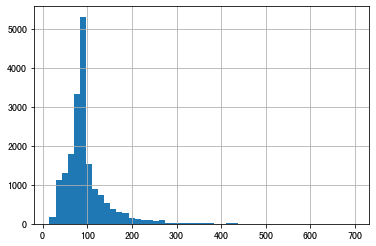

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

df['AREA'].hist(bins=50)

In [25]:
df['C_floor'].value_counts() # middle多，high-low持平

middle    7512
high      5707
low       5295
Name: C_floor, dtype: int64

In [26]:
df['school'].value_counts() # 学区房更多

1    10876
0     7638
Name: school, dtype: int64

In [27]:
df['subway'].value_counts() # 地铁房持平

1    9334
0    9180
Name: subway, dtype: int64

<AxesSubplot:>

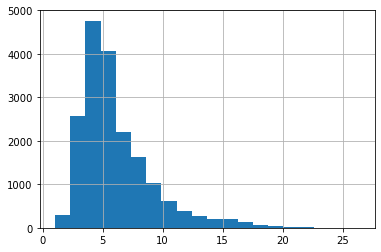

In [30]:
df['per_price'].hist(bins=20)

In [7]:
district_map = {
    'luohu': '罗湖',
    'pingshan': '坪山',
    'nanshan': '南山',
    'guangming': '光明',
    'longhua': '龙华',
    'yantian':'盐田',
    'longgang':'龙岗',
    'futian': '福田',
    'baoan': '宝安',
    'dapengxinqu': '大鹏新区'
}
df['district_cn'] = df['district'].map(district_map)
df.head()

,district,roomnum,hall,AREA,C_floor,school,subway,per_price,district_cn
0,luohu,3,2,89.0,high,1,1,7.9551,罗湖
1,luohu,3,2,69.4,high,1,1,6.5994,罗湖
2,luohu,2,2,68.0,high,0,1,4.5118,罗湖
3,luohu,2,2,62.0,middle,1,1,6.2581,罗湖
4,luohu,2,1,51.7,middle,1,1,8.4333,罗湖


In [8]:
from matplotlib import pylab

pylab.rcParams['font.sans-serif'] = ['SimHei']
pylab.rcParams['axes.unicode_minus'] = False

import matplotlib
matplotlib.matplotlib_fname()

from matplotlib.font_manager import _rebuild
_rebuild()

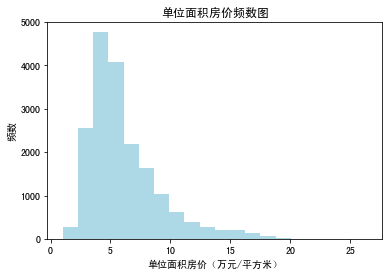

In [11]:
df.per_price.hist(grid=False, bins=20, color='lightblue')
plt.title('单位面积房价频数图')
plt.xlabel('单位面积房价（万元/平方米）')
plt.ylabel('频数')
plt.show()
# 数据右偏

In [15]:
print(df['per_price'].agg(['mean', 'std', 'median']))
print(df['per_price'].quantile([.25, .5, .75]))

mean      6.118192
std       3.050218
median    5.246300
Name: per_price, dtype: float64
0.25    4.0526
0.50    5.2463
0.75    7.3574
Name: per_price, dtype: float64


In [16]:
print(df['per_price'].min(), df['per_price'].max())

1.0101 26.3968


In [17]:
df['AREA'].describe()

count    18514.000000
mean        95.224924
std         48.570130
min         15.000000
25%         70.800000
50%         88.000000
75%        103.687500
max        697.200000
Name: AREA, dtype: float64

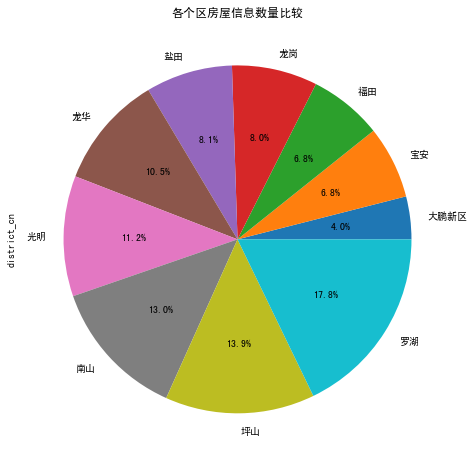

In [21]:
# colors = ['#71ae46','#96b744','#c4cc38','#ebe12a','#eab026','#e3852b','#d85d2a','#ce2626','#ac2026','#71ae46']
# df.district.value_counts().sort_values().plot(kind='pie',autopct="%1.1f%%",colors=colors)
df['district_cn'].value_counts().sort_values().plot(kind='pie',autopct="%1.1f%%", figsize=(12, 8))
plt.title('各个区房屋信息数量比较')
plt.show()

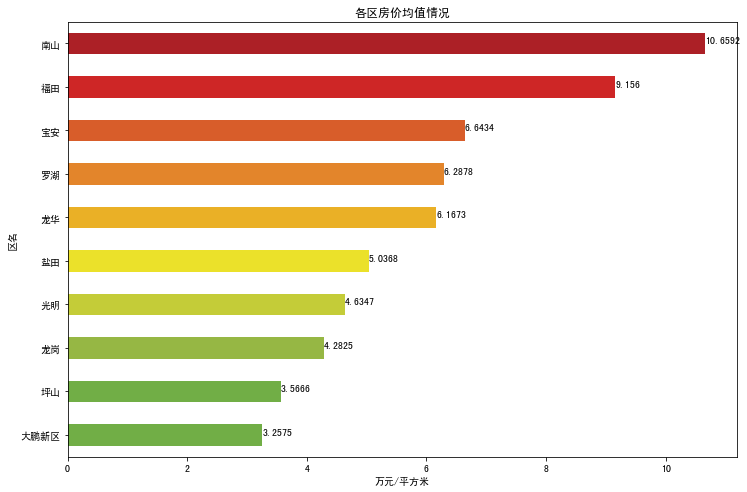

In [35]:
# 各区房屋均值比较
colors = ['#71ae46','#71ae46','#96b744','#c4cc38','#ebe12a','#eab026','#e3852b','#d85d2a','#ce2626','#ac2026']
df.groupby('district_cn')['per_price'].mean().sort_values().plot(kind='barh', color=colors, figsize=(12, 8))
plt.xlabel('万元/平方米')
plt.ylabel('区名')
plt.title('各区房价均值情况')

mean_prices = df.groupby('district_cn')['per_price'].mean().sort_values()
for i in range(len(mean_prices)):
    plt.text(mean_prices[i], i, round(mean_prices[i], 4))

In [36]:
import seaborn as sns

<AxesSubplot:xlabel='district_cn', ylabel='per_price'>

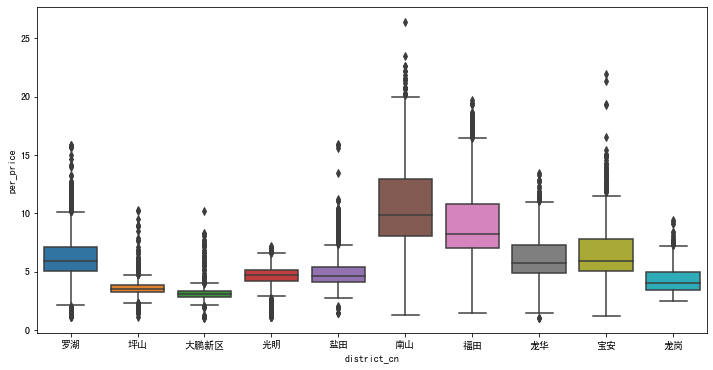

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='district_cn', y='per_price') # district_cn has correlation with per_price

In [39]:
df.head()

,district,roomnum,hall,AREA,C_floor,school,subway,per_price,district_cn
0,luohu,3,2,89.0,high,1,1,7.9551,罗湖
1,luohu,3,2,69.4,high,1,1,6.5994,罗湖
2,luohu,2,2,68.0,high,0,1,4.5118,罗湖
3,luohu,2,2,62.0,middle,1,1,6.2581,罗湖
4,luohu,2,1,51.7,middle,1,1,8.4333,罗湖


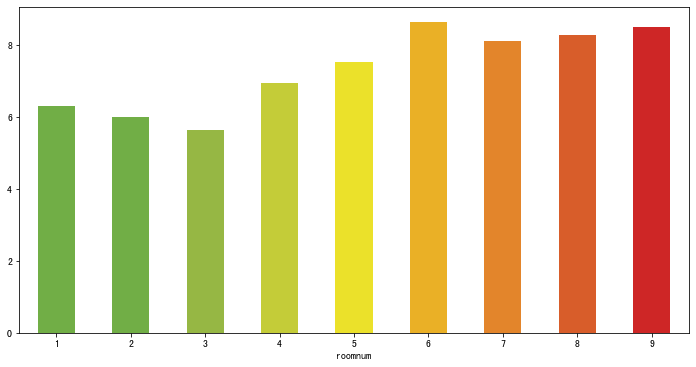

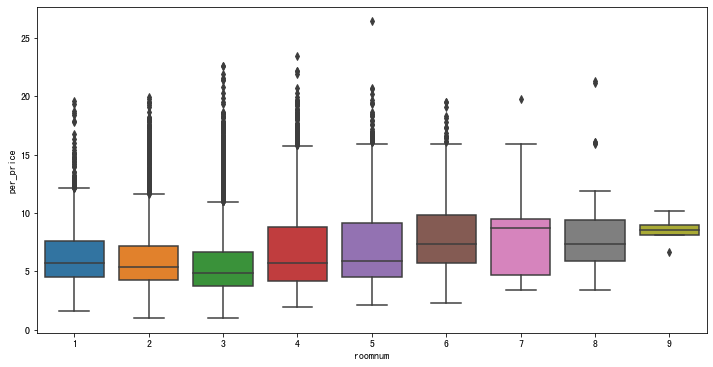

In [45]:
plt.figure(figsize=(12, 6))
df.groupby('roomnum')['per_price'].mean().plot(kind='bar', color=colors)
plt.xticks(rotation=360)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='roomnum', y='per_price')
plt.xticks(rotation=360)
plt.show()

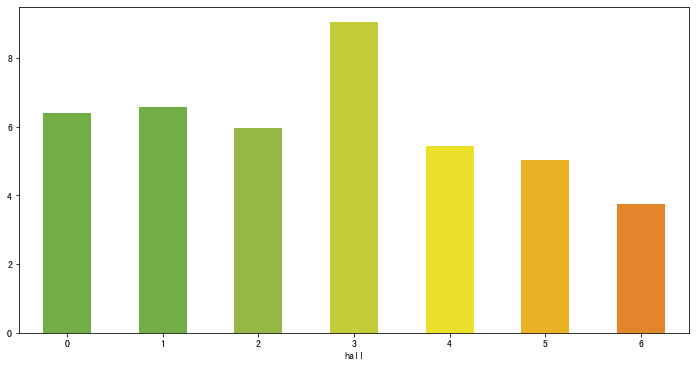

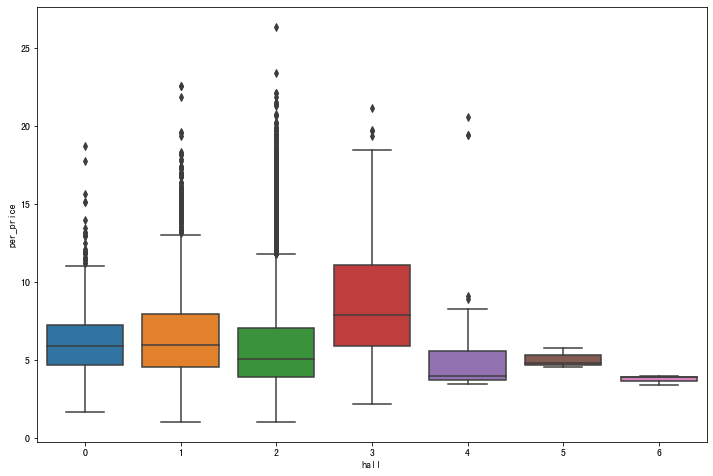

In [47]:
plt.figure(figsize=(12, 6))
df.groupby('hall')['per_price'].mean().plot(kind='bar', color=colors)
plt.xticks(rotation=360)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='hall', y='per_price')
plt.xticks(rotation=360)
plt.show()

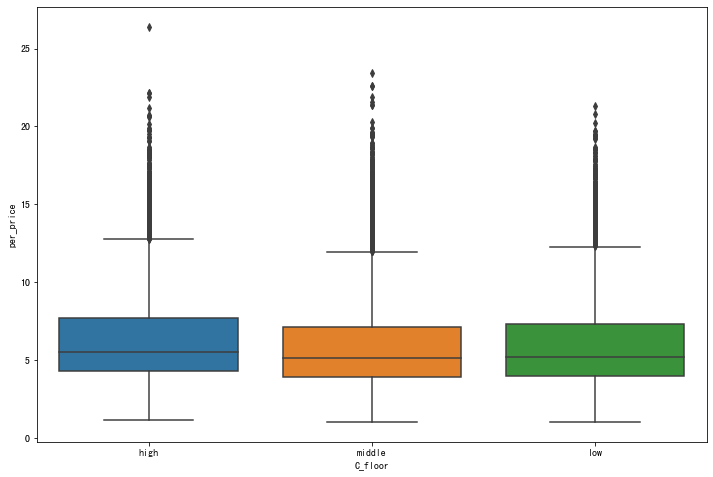

In [48]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='C_floor', y='per_price')
plt.xticks(rotation=360)
plt.show()

In [49]:
# 不同厅数对房价有一定影响，房间数、楼层高度对房价影响不大

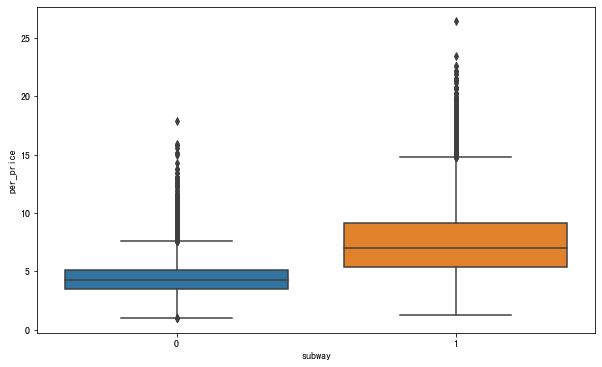

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='subway', y='per_price')
plt.xticks(rotation=360)
plt.show()

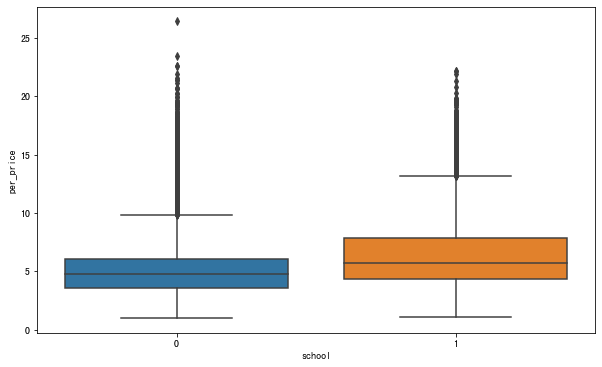

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='school', y='per_price')
plt.xticks(rotation=360)
plt.show()

In [53]:
def stack2dim(raw, i, j, rotation=0, location='upper left'):
    '''
    此函数是为了画两个维度标准化的堆积柱状图
    要求是目标变量j是二分类的
    raw为pandas的DataFrame数据框
    i、j为两个分类变量的变量名称，要求带引号，比如"school"
    rotation：水平标签旋转角度，默认水平方向，如标签过长，可设置一定角度，比如设置rotation = 40
    location：分类标签的位置，如果被主体图形挡住，可更改为'upper left'

    '''
    import math
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    data_raw = pd.crosstab(raw[i], raw[j])
    data = data_raw.div(data_raw.sum(1), axis=0)  # 交叉表转换成比率，为得到标准化堆积柱状图

    # 计算x坐标，及bar宽度
    createVar = locals()
    x = [0]  # 每个bar的中心x轴坐标
    width = []  # bar的宽度
    k = 0
    for n in range(len(data)):
        # 根据频数计算每一列bar的宽度
        createVar['width' + str(n)] = data_raw.sum(axis=1)[n] / sum(data_raw.sum(axis=1))
        width.append(createVar['width' + str(n)])
        if n == 0:
            continue
        else:
            k += createVar['width' + str(n - 1)] / 2 + createVar['width' + str(n)] / 2 + 0.05
            x.append(k)

            # 以下是通过频率交叉表矩阵生成一列对应堆积图每一块位置数据的数组，再把数组转化为矩阵
    y_mat = []
    n = 0
    for p in range(data.shape[0]):
        for q in range(data.shape[1]):
            n += 1
            y_mat.append(data.iloc[p, q])
            if n == data.shape[0] * 2:
                break
            elif n % 2 == 1:
                y_mat.extend([0] * (len(data) - 1))
            elif n % 2 == 0:
                y_mat.extend([0] * len(data))

    y_mat = np.array(y_mat).reshape(len(data) * 2, len(data))
    y_mat = pd.DataFrame(y_mat)  # bar图中的y变量矩阵，每一行是一个y变量

    # 通过x，y_mat中的每一行y，依次绘制每一块堆积图中的每一块图
    createVar = locals()
    for row in range(len(y_mat)):
        createVar['a' + str(row)] = y_mat.iloc[row, :]
        if row % 2 == 0:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], label='0', color='#5F9EA0')
            else:
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], color='#5F9EA0')
        elif row % 2 == 1:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], label='1', color='#8FBC8F')
            else:
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], color='#8FBC8F')

    plt.title(j + ' vs ' + i)
    group_labels = [data.index.name + ': ' + str(name) for name in data.index]
    plt.xticks(x, group_labels, rotation=rotation)
    plt.ylabel(j)
    plt.legend(shadow=True, loc=location)
    plt.show()

In [59]:
print(pd.crosstab(df.subway, df.school))
subway_school_cross = pd.crosstab(df['subway'], df['school'])
subway_school_cross.sum(1) # axis=1
subway_school_cross = subway_school_cross.div(subway_school_cross.sum(1), axis=0)
subway_school_cross

school     0     1
subway            
0       4877  4303
1       2761  6573


school,0,1
subway,,
0,0.531264,0.468736
1,0.295800,0.704200


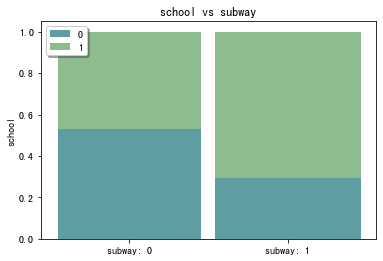

In [60]:
stack2dim(df, i='subway', j='school')

In [61]:
# 是否近地铁和学区房对房价有影响，且地铁房中学区房比例较非地铁房高

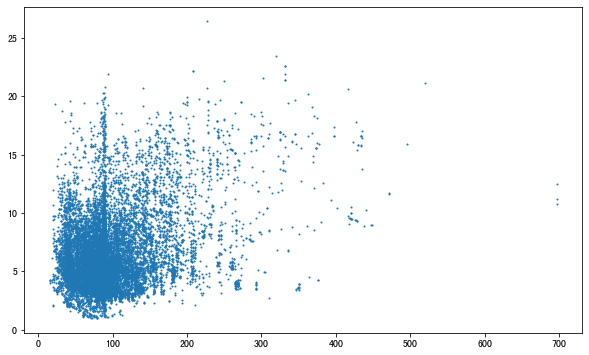

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df['AREA'], df['per_price'], s=1)

In [65]:
df[['AREA', 'per_price']].corr()

,AREA,per_price
AREA,1.000000,0.313322
per_price,0.313322,1.000000


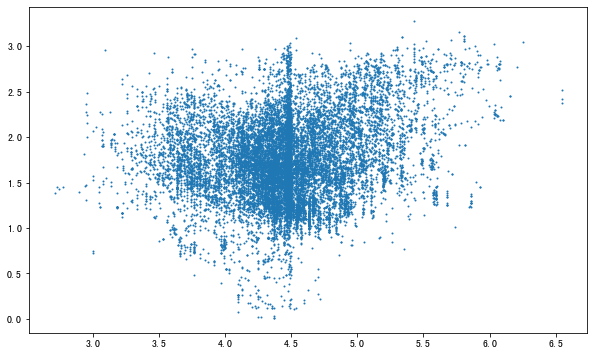

In [68]:
import numpy as np

df['log_AREA'] = np.log(df['AREA'])
df['log_per_price'] = np.log(df['per_price'])
plt.figure(figsize=(10, 6))
plt.scatter(df['log_AREA'], df['log_per_price'], s=1)

In [69]:
df[['log_AREA', 'log_per_price']].corr()

,log_AREA,log_per_price
log_AREA,1.000000,0.187152
log_per_price,0.187152,1.000000


In [70]:
def get_sample(df, sampling="simple_random", k=1, stratified_col=None):
    """
    对输入的 dataframe 进行抽样的函数

    参数:
        - df: 输入的数据框 pandas.dataframe 对象

        - sampling:抽样方法 str
            可选值有 ["simple_random", "stratified", "systematic"]
            按顺序分别为: 简单随机抽样、分层抽样、系统抽样

        - k: 抽样个数或抽样比例 int or float
            (int, 则必须大于0; float, 则必须在区间(0,1)中)
            如果 0 < k < 1 , 则 k 表示抽样对于总体的比例
            如果 k >= 1 , 则 k 表示抽样的个数；当为分层抽样时，代表每层的样本量

        - stratified_col: 需要分层的列名的列表 list
            只有在分层抽样时才生效

    返回值:
        pandas.dataframe 对象, 抽样结果
    """
    import random
    import pandas as pd
    from functools import reduce
    import numpy as np
    import math

    len_df = len(df)
    if k <= 0:
        raise AssertionError("k不能为负数")
    elif k >= 1:
        assert isinstance(k, int), "选择抽样个数时, k必须为正整数"
        sample_by_n = True
        if sampling is "stratified":
            alln = k * df.groupby(by=stratified_col)[stratified_col[0]].count().count()  # 有问题的
            # alln=k*df[stratified_col].value_counts().count()
            if alln >= len_df:
                raise AssertionError("请确认k乘以层数不能超过总样本量")
    else:
        sample_by_n = False
        if sampling in ("simple_random", "systematic"):
            k = math.ceil(len_df * k)

    # print(k)

    if sampling is "simple_random":
        print("使用简单随机抽样")
        idx = random.sample(range(len_df), k)
        res_df = df.iloc[idx, :].copy()
        return res_df

    elif sampling is "systematic":
        print("使用系统抽样")
        step = len_df // k + 1  # step=len_df//k-1
        start = 0  # start=0
        idx = range(len_df)[start::step]  # idx=range(len_df+1)[start::step]
        res_df = df.iloc[idx, :].copy()
        # print("k=%d,step=%d,idx=%d"%(k,step,len(idx)))
        return res_df

    elif sampling is "stratified":
        assert stratified_col is not None, "请传入包含需要分层的列名的列表"
        assert all(np.in1d(stratified_col, df.columns)), "请检查输入的列名"

        grouped = df.groupby(by=stratified_col)[stratified_col[0]].count()
        if sample_by_n == True:
            group_k = grouped.map(lambda x: k)
        else:
            group_k = grouped.map(lambda x: math.ceil(x * k))

        res_df = df.head(0)
        for df_idx in group_k.index:
            df1 = df
            if len(stratified_col) == 1:
                df1 = df1[df1[stratified_col[0]] == df_idx]
            else:
                for i in range(len(df_idx)):
                    df1 = df1[df1[stratified_col[i]] == df_idx[i]]
            idx = random.sample(range(len(df1)), group_k[df_idx])
            group_df = df1.iloc[idx, :].copy()
            res_df = res_df.append(group_df)
        return res_df

    else:
        raise AssertionError("sampling is illegal")

In [72]:
data = get_sample(df, sampling='stratified', k=250, stratified_col=['district_cn'])
data.shape

(2500, 11)

In [73]:
data.head()

,district,roomnum,hall,AREA,C_floor,school,subway,per_price,district_cn,log_AREA,log_per_price
7845,guangming,3,2,88.60,middle,1,0,4.5147,光明,4.484132,1.507339
7035,guangming,2,2,76.05,middle,1,0,5.2728,光明,4.331391,1.662562
6697,guangming,5,2,263.00,low,1,0,6.0836,光明,5.572154,1.805597
7911,guangming,3,2,89.00,low,0,0,4.4831,光明,4.488636,1.500315
7190,guangming,3,2,89.00,high,0,0,5.1124,光明,4.488636,1.631669


In [89]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

f = ['district_cn', 'roomnum', 'hall', 'school', 'subway']
for x in f:
    print(x, 'p value is', sm.stats.anova_lm(ols('per_price~C({})'.format(x), data=data).fit()).values[0][4])

district_cn p value is 0.0
roomnum p value is 1.0736099956398596e-18
hall p value is 1.4523661000537675e-08
school p value is 3.409858396620346e-27
subway p value is 9.135104685360897e-197


In [92]:
data['hall_equal_3'] = data['hall'].apply(lambda x: 1 if x == 3 else 0)

In [93]:
data.head()

,district,roomnum,hall,AREA,C_floor,school,subway,per_price,district_cn,log_AREA,log_per_price,hall_2,hall_equal_3
7845,guangming,3,2,88.60,middle,1,0,4.5147,光明,4.484132,1.507339,0,0
7035,guangming,2,2,76.05,middle,1,0,5.2728,光明,4.331391,1.662562,0,0
6697,guangming,5,2,263.00,low,1,0,6.0836,光明,5.572154,1.805597,0,0
7911,guangming,3,2,89.00,low,0,0,4.4831,光明,4.488636,1.500315,0,0
7190,guangming,3,2,89.00,high,0,0,5.1124,光明,4.488636,1.631669,0,0


In [103]:
data2 = pd.concat([data[['roomnum', 'AREA', 'school', 'subway', 'hall_equal_3', 'per_price']], pd.get_dummies(data[['district_cn', 'C_floor']])], axis=1)
data2.head()
print(data2.columns)

Index(['roomnum', 'AREA', 'school', 'subway', 'hall_equal_3', 'per_price',
       'district_cn_光明', 'district_cn_南山', 'district_cn_坪山',
       'district_cn_大鹏新区', 'district_cn_宝安', 'district_cn_盐田',
       'district_cn_福田', 'district_cn_罗湖', 'district_cn_龙华', 'district_cn_龙岗',
       'C_floor_high', 'C_floor_low', 'C_floor_middle'],
      dtype='object')


                            OLS Regression Results                            
Dep. Variable:              per_price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     248.0
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:11:10   Log-Likelihood:                -5151.3
No. Observations:                2500   AIC:                         1.034e+04
Df Residuals:                    2483   BIC:                         1.044e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.7015      0.099  

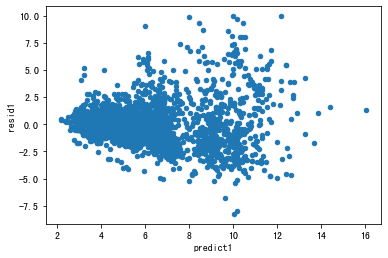

'\n作散点图 → 模型诊断图：从左往右图形发散，即：存在异方差现象，对因变量取对数\n'

In [105]:
lm1 = ols('per_price~district_cn_光明+district_cn_南山+district_cn_坪山+district_cn_大鹏新区+district_cn_宝安+district_cn_盐田+district_cn_福田+district_cn_罗湖+district_cn_龙华+district_cn_龙岗+school+subway+C_floor_high+C_floor_middle+C_floor_low+AREA+hall_equal_3+roomnum', data=data2).fit()
lm1_summary = lm1.summary()
print(lm1_summary)  # 回归结果展示

data['predict1'] = lm1.predict(data2)
data['resid1'] = lm1.resid
data.plot('predict1','resid1',kind='scatter')
plt.show();

                            OLS Regression Results                            
Dep. Variable:              per_price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     264.4
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:12:46   Log-Likelihood:                -5151.9
No. Observations:                2500   AIC:                         1.034e+04
Df Residuals:                    2484   BIC:                         1.043e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.6451      0.085  

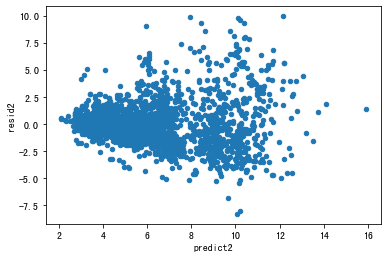

In [106]:
lm2 = ols('per_price~district_cn_光明+district_cn_南山+district_cn_坪山+district_cn_大鹏新区+district_cn_宝安+district_cn_盐田+district_cn_福田+district_cn_罗湖+district_cn_龙华+district_cn_龙岗+school+subway+C_floor_high+C_floor_middle+C_floor_low+AREA+hall_equal_3', data=data2).fit()
lm2_summary = lm2.summary()
print(lm2_summary)  # 回归结果展示

data['predict2'] = lm2.predict(data2)
data['resid2'] = lm2.resid
data.plot('predict2','resid2',kind='scatter')
plt.show();

In [107]:
# 作散点图 → 模型诊断图：从左往右图形发散，即：存在异方差现象，对因变量取对数

                            OLS Regression Results                            
Dep. Variable:          log_per_price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     319.8
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:56:44   Log-Likelihood:                -245.12
No. Observations:                2500   AIC:                             522.2
Df Residuals:                    2484   BIC:                             615.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9580      0.012  

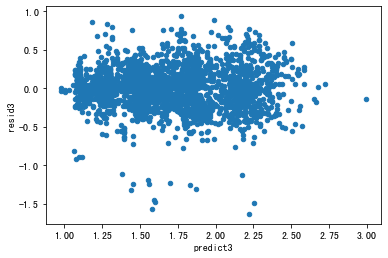

In [109]:
data2['log_per_price'] = np.log(data2['per_price'])

lm3 = ols('log_per_price~district_cn_光明+district_cn_南山+district_cn_坪山+district_cn_大鹏新区+district_cn_宝安+district_cn_盐田+district_cn_福田+district_cn_罗湖+district_cn_龙华+district_cn_龙岗+school+subway+C_floor_high+C_floor_middle+C_floor_low+AREA+hall_equal_3', data=data2).fit()
lm3_summary = lm3.summary()
print(lm3_summary)  # 回归结果展示

data['predict3'] = lm3.predict(data2)
data['resid3'] = lm3.resid
data.plot('predict3', 'resid3', kind='scatter')
plt.show();

                            OLS Regression Results                            
Dep. Variable:          log_per_price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     309.7
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:58:45   Log-Likelihood:                -271.44
No. Observations:                2500   AIC:                             574.9
Df Residuals:                    2484   BIC:                             668.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5176      0.049  

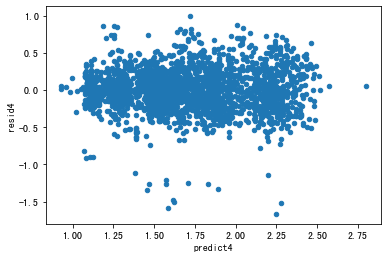

In [110]:
data2['log_AREA'] = np.log(data2['AREA'])

lm4 = ols('log_per_price~district_cn_南山+district_cn_坪山+district_cn_大鹏新区+district_cn_宝安+district_cn_盐田+district_cn_福田+district_cn_罗湖+district_cn_龙华+district_cn_龙岗+school+subway+C_floor_high+C_floor_middle+C_floor_low+log_AREA+hall_equal_3', data=data2).fit()
lm4_summary = lm4.summary()
print(lm4_summary)  # 回归结果展示

data['predict4'] = lm4.predict(data2)
data['resid4'] = lm4.resid
data.plot('predict4', 'resid4', kind='scatter')
plt.show();

In [112]:
schools=['坪山','龙岗','光明','盐田','龙华','罗湖','宝安','福田','南山']
print('大鹏新区非学区房\t',round(data[(data['district_cn']=='大鹏新区')&(data['school']==0)]['per_price'].mean(),2),'万元/平方米\t',
     '大鹏新区学区房\t',round(data[(data['district_cn']=='大鹏新区')&(data['school']==1)]['per_price'].mean(),2),'万元/平方米')
print('-------------------------------------------------------------------------')
for i in schools:
    print(i+'非学区房\t',round(data2[(data2['district_cn_'+i]==1)&(data2['school']==0)]['per_price'].mean(),2),'万元/平方米\t',i+'学区房\t',round(data2[(data2['district_cn_'+i]==1)&(data2['school']==1)]['per_price'].mean(),2),'万元/平方米')

大鹏新区非学区房	 3.16 万元/平方米	 大鹏新区学区房	 3.31 万元/平方米
-------------------------------------------------------------------------
坪山非学区房	 3.51 万元/平方米	 坪山学区房	 3.65 万元/平方米
龙岗非学区房	 4.2 万元/平方米	 龙岗学区房	 4.4 万元/平方米
光明非学区房	 4.47 万元/平方米	 光明学区房	 4.68 万元/平方米
盐田非学区房	 5.12 万元/平方米	 盐田学区房	 5.12 万元/平方米
龙华非学区房	 5.37 万元/平方米	 龙华学区房	 6.73 万元/平方米
罗湖非学区房	 5.83 万元/平方米	 罗湖学区房	 6.61 万元/平方米
宝安非学区房	 5.82 万元/平方米	 宝安学区房	 7.28 万元/平方米
福田非学区房	 8.89 万元/平方米	 福田学区房	 9.39 万元/平方米
南山非学区房	 11.43 万元/平方米	 南山学区房	 10.12 万元/平方米


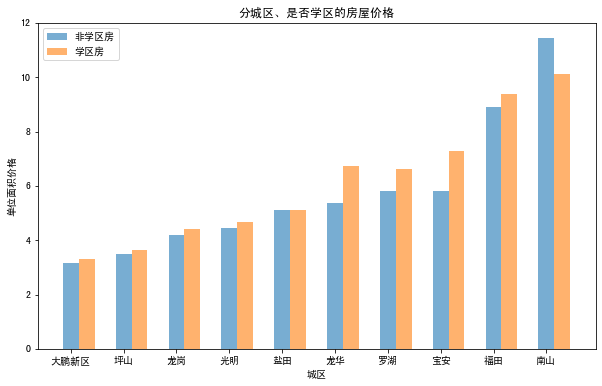

In [116]:
districts = ['大鹏新区', '坪山', '龙岗', '光明', '盐田', '龙华', '罗湖', '宝安', '福田', '南山']
non_school = []
school = []
for i in districts:
    non_school.append(data[(data['district_cn'] == i) & (data['school'] == 0)]['per_price'].mean())
    school.append(data[(data['district_cn'] == i) & (data['school'] == 1)]['per_price'].mean())

d1 = pd.Series(non_school).T.values
d2 = pd.Series(school).T.values
plt.figure(figsize=(10, 6))
x1 = range(0, len(d1))
x2 = [i + 0.3 for i in x1]
plt.bar(x1, d1, width=0.3, alpha=0.6, label='非学区房')
plt.bar(x2, d2, width=0.3, alpha=0.6, label='学区房')
plt.xlabel('城区')
plt.ylabel('单位面积价格')
plt.title('分城区、是否学区的房屋价格')
plt.legend(loc='upper left')
plt.xticks(range(0, 10), districts)
plt.show() # 除了 南山 之外，其他区的 学区房价格 均比 非学区房 高

In [117]:
num_noschool_ns = data[(data['district_cn'] == '南山') & (data['school'] == 0)].shape[0]
num_school_ns = data[(data['district_cn'] == '南山') & (data['school'] == 1)].shape[0]
print('南山非学区房\t', num_noschool_ns, '\t', '南山学区房\t', num_school_ns, '\t',
      '南山学区房占南山所有二手房的{}'.format(int(num_school_ns) / int(int(num_school_ns) + int(num_noschool_ns))))

南山非学区房	 79 	 南山学区房	 171 	 南山学区房占南山所有二手房的0.684


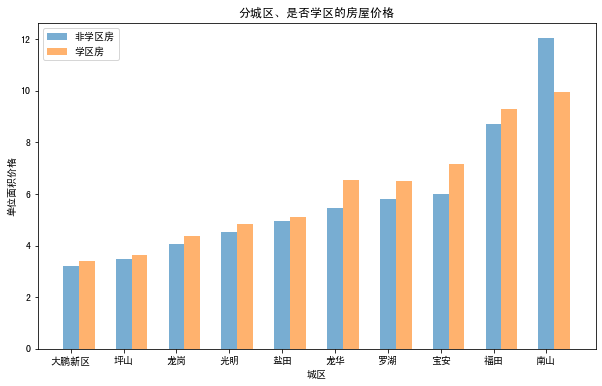

In [118]:
# 使用整体数据再画一次
districts = ['大鹏新区','坪山','龙岗','光明','盐田','龙华','罗湖','宝安','福田','南山']
non_school = []
school = []
for i in districts:
    non_school.append(df[(df['district_cn'] == i) & (df['school'] == 0)]['per_price'].mean())
    school.append(df[(df['district_cn'] == i) & (df['school'] == 1)]['per_price'].mean())

d1 = pd.Series(non_school).T.values
d2 = pd.Series(school).T.values
plt.figure(figsize=(10, 6))
x1 = range(0, len(d1))
x2 = [i + 0.3 for i in x1]
plt.bar(x1, d1, width=0.3, alpha=0.6, label='非学区房')
plt.bar(x2, d2, width=0.3, alpha=0.6, label='学区房')
plt.xlabel('城区')
plt.ylabel('单位面积价格')
plt.title('分城区、是否学区的房屋价格')
plt.legend(loc='upper left')
plt.xticks(range(0, 10), districts)
plt.show() # 除了 南山 之外，其他区的 学区房价格 均比 非学区房 高

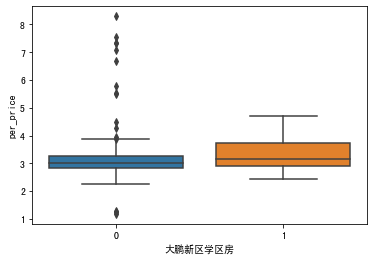

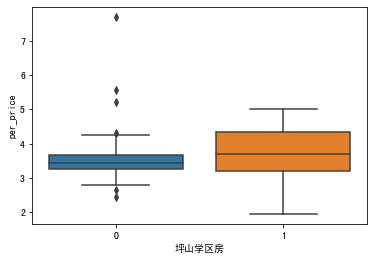

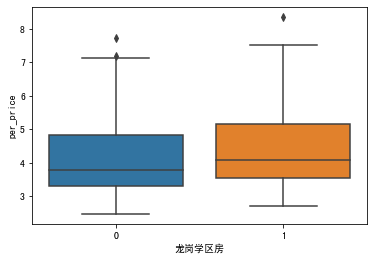

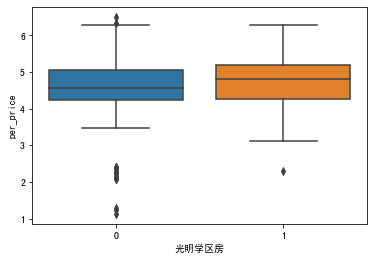

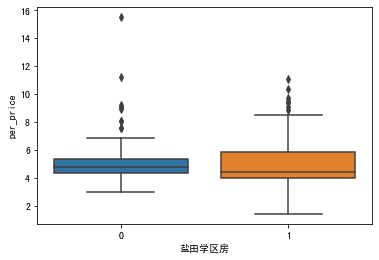

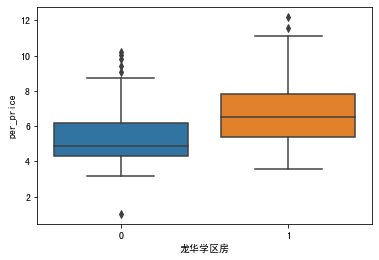

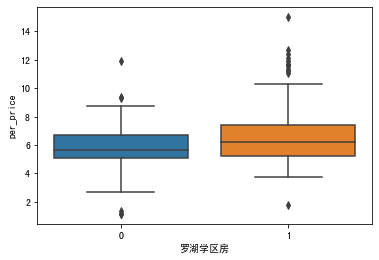

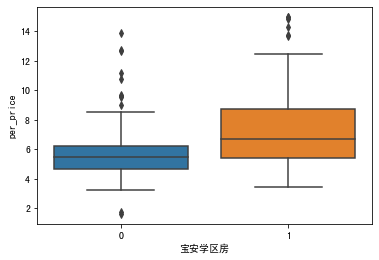

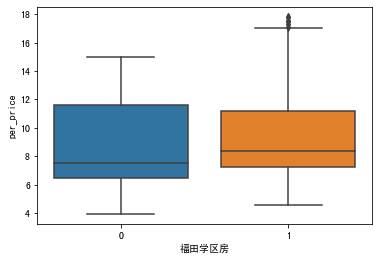

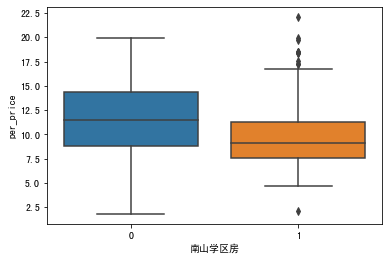

In [119]:
districts = ['大鹏新区','坪山','龙岗','光明','盐田','龙华','罗湖','宝安','福田','南山']
for i in districts:
    # sns.boxplot(x=df_temp6['school'], y=df_temp5['per_price'],
    #             palette=sns.cubehelix_palette(4, start=2, rot=0, dark=0, light=.95))
    sns.boxplot(x=data[data['district_cn'] == i]['school'], y=data[data['district_cn'] == i]['per_price'])
    # data[data.district==i][['school','per_price']].boxplot(by='school',patch_artist=True,color='#b6b51f')
    plt.xlabel(i + '学区房')
    plt.show()

In [126]:
'''
预测要找一个条件为：
1. 南山区
2. 有3个房间
3. 面积大概再80㎡左右
4. 有地铁
5. 学区房
的房子的大概花费
'''
# lm4 = ols('log_per_price~district_cn_南山+district_cn_坪山+district_cn_大鹏新区+district_cn_宝安+district_cn_盐田+district_cn_福田+district_cn_罗湖+district_cn_龙华+district_cn_龙岗+school+subway+C_floor_high+C_floor_middle+C_floor_low+log_AREA+hall_equal_3', data=data2).fit()
X_new = {}
X_new['district_cn_南山'] = 1
X_new['district_cn_坪山'] = 0
X_new['district_cn_大鹏新区'] = 0
X_new['district_cn_宝安'] = 0
X_new['district_cn_盐田'] = 0
X_new['district_cn_福田'] = 0
X_new['district_cn_罗湖'] = 0
X_new['district_cn_龙华'] = 0
X_new['district_cn_龙岗'] = 0
X_new['district_cn_龙岗'] = 0
X_new['school'] = 1
X_new['subway'] = 1
X_new['C_floor_high'] = 1
X_new['C_floor_middle'] = 0
X_new['C_floor_low'] = 0
X_new['log_AREA'] = np.log(80)
X_new['hall_equal_3'] = 1
X_new = pd.Series(X_new).to_frame().T

#预测值
import math
print("单位面积房价:", round(math.exp(lm4.predict(X_new)), 2), "万元/平方米")
print("总价:", round(math.exp(lm4.predict(X_new)) * 80, 2), "万元")

单位面积房价: 13.26 万元/平方米
总价: 1060.56 万元
